# Heart Disease Prediction

<b>Dataset</b>
<p>Dataset is publicly available on Kaggle Website</p>
<br />
<b>Attributes</b>

<br />
<br>
<font>
<b>Demographic</b>
 <br>
<br>
<li>Sex: male or female(Nominal)</li><br>
<li>Age: Age of the patient(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)</li><br>
<li>Education: no further information provideds</li><br>
    
<b>Behavioral</b>
<br />
    <br>
<li>Current Smoker: whether or not the patient is a current smoker (Nominal)</li><br>
<li>Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)</li><br>
    
<b>Information on medical history</b>
<br />
    <br>
<li>BP Meds: whether or not the patient was on blood pressure medication (Nominal)</li><br>
<li>Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)</li><br>
<li>Prevalent Hyp: whether or not the patient was hypertensive (Nominal)</li><br>
<li>Diabetes: whether or not the patient had diabetes (Nominal)</li><br>
    
    
<b>Information on current medical condition:</b>
<br />
    <br>
<li>Tot Chol: total cholesterol level (Continuous)</li><br>
<li>Dia BP: diastolic blood pressure (Continuous)</li><br>
<li>BMI: Body Mass Index (Continuous)</li><br>
<li>Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)</li><br>
<li>Glucose: glucose level (Continuous)
</li><br>
    
<b>Target variable to predict:</b>
 <br />
    <br>
<li> Ten-year coronary heart disease (CHD) - (binary: “1”, means “Yes”, “0” means “No”)</li><br>

In [81]:
 import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings("ignore") 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers

In [148]:
data=pd.read_csv("framingham_heart_disease.csv")

In [149]:
data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [150]:
# Shape of the dataset
print("Dataset Shape :",data.shape)

Dataset Shape : (4238, 16)


In [151]:
# Returns Null counts & Data Types for all features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [152]:
# Missing Values 
data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

<BarContainer object of 16 artists>

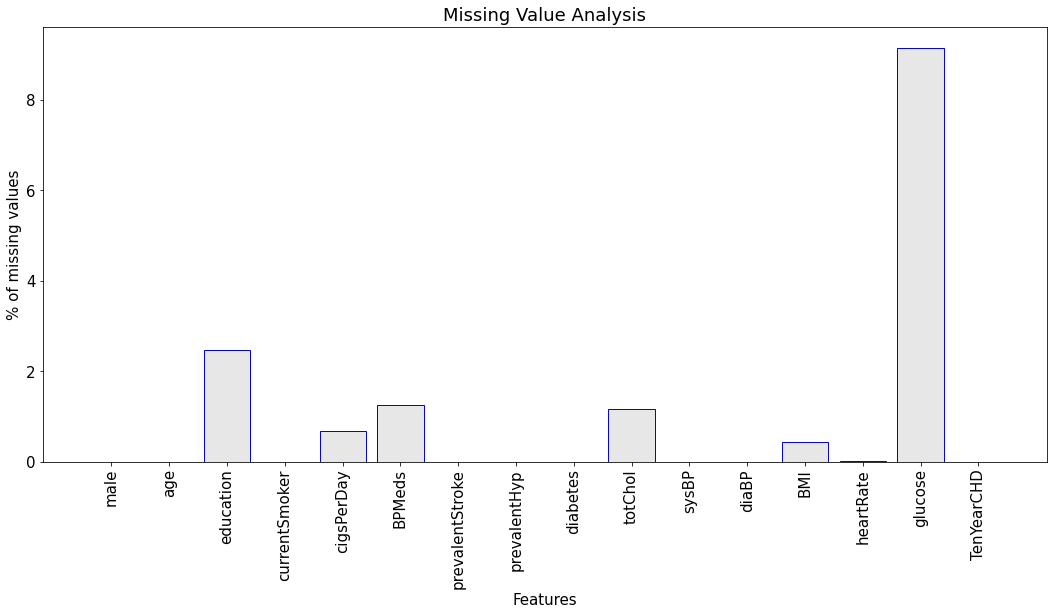

In [7]:
# Missing  Values Percentage
percent_missing = data.isnull().sum() * 100 / len(data)
missing_value_df = pd.DataFrame({'column_name': data.columns,
                                 'percent_missing': percent_missing})

plt.figure(figsize = (18,8))
plt.rcParams.update({'font.size': 15})
plt.xticks(rotation=90)
plt.title("Missing Value Analysis")
plt.xlabel("Features")
plt.ylabel("% of missing values")
plt.bar(missing_value_df["column_name"],missing_value_df["percent_missing"],color=(0.1, 0.1, 0.1, 0.1),edgecolor='blue')

In [153]:
# Dropping all rows with missing data
data= data.dropna()
data.isna().sum()
data.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

array([[<AxesSubplot:title={'center':'male'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'education'}>,
        <AxesSubplot:title={'center':'currentSmoker'}>],
       [<AxesSubplot:title={'center':'cigsPerDay'}>,
        <AxesSubplot:title={'center':'BPMeds'}>,
        <AxesSubplot:title={'center':'prevalentStroke'}>,
        <AxesSubplot:title={'center':'prevalentHyp'}>],
       [<AxesSubplot:title={'center':'diabetes'}>,
        <AxesSubplot:title={'center':'totChol'}>,
        <AxesSubplot:title={'center':'sysBP'}>,
        <AxesSubplot:title={'center':'diaBP'}>],
       [<AxesSubplot:title={'center':'BMI'}>,
        <AxesSubplot:title={'center':'heartRate'}>,
        <AxesSubplot:title={'center':'glucose'}>,
        <AxesSubplot:title={'center':'TenYearCHD'}>]], dtype=object)

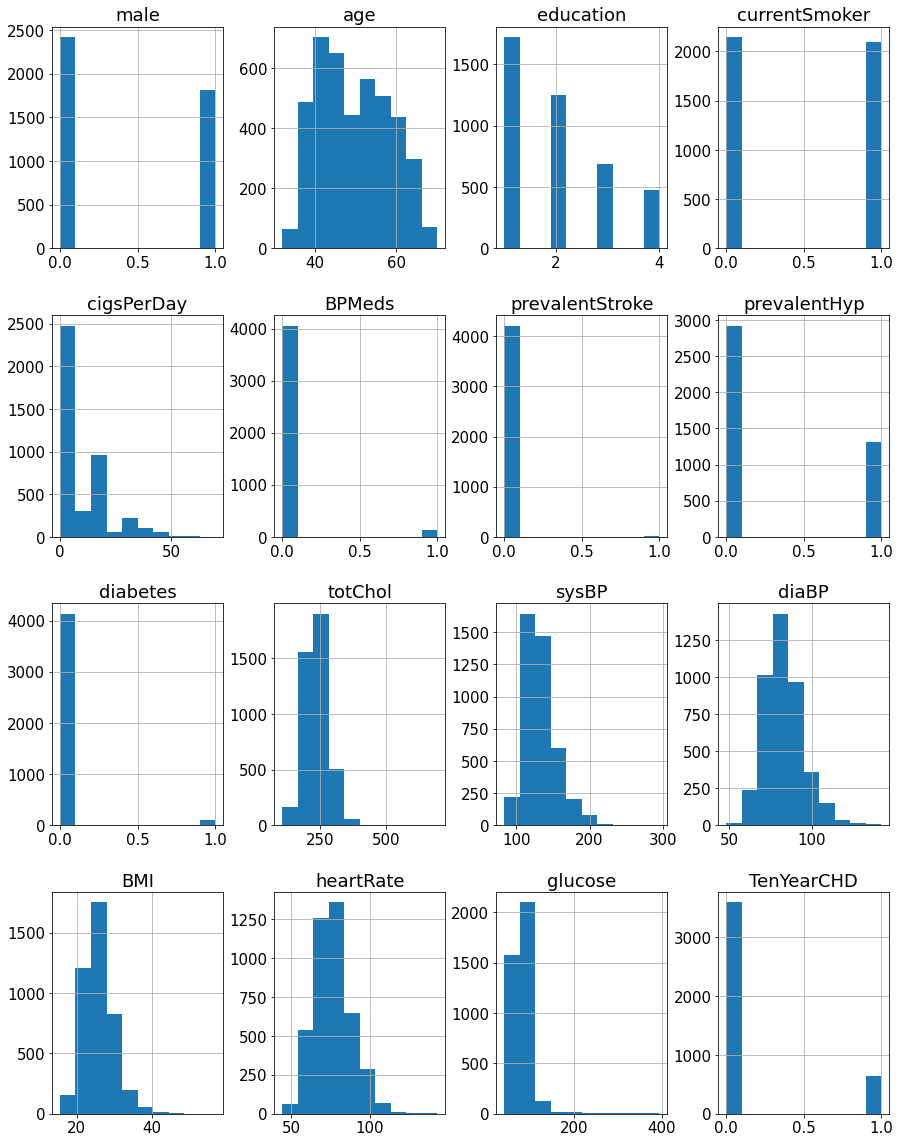

In [8]:
# checking distributions using histograms
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
data.hist(ax = ax)

# Resampling Imbalanced Dataset

Total patients at risk of CHD:  644
Total patients not at risk of CHD:  3594


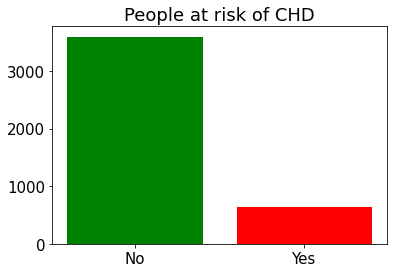

In [138]:
from collections import Counter
chdc = Counter(data['TenYearCHD'])
print('Total patients at risk of CHD: ', chdc[1])
print('Total patients not at risk of CHD: ', chdc[0])
plt.bar(list(chdc.keys()), chdc.values(), color = ['g', 'r'])
plt.xticks(list(chdc.keys()), ['No', 'Yes'])
plt.title('People at risk of CHD')
plt.show()

# Undersampling Method

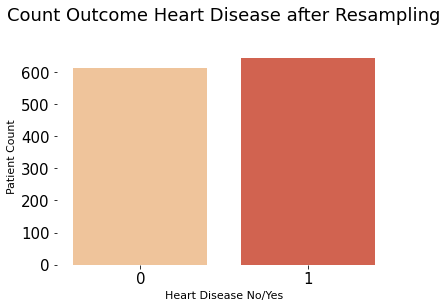

In [137]:
shuffled_df = data.sample(frac=1,random_state=4)

CHD_df = shuffled_df.loc[shuffled_df['TenYearCHD'] == 1]

non_CHD_df = shuffled_df.loc[shuffled_df['TenYearCHD'] == 0].sample(n=611,random_state=42)


normalized_df = pd.concat([CHD_df, non_CHD_df])

normalized_df.TenYearCHD.value_counts()

sns.countplot(normalized_df.TenYearCHD, palette="OrRd")
plt.box(False)
plt.xlabel('Heart Disease No/Yes',fontsize=11)
plt.ylabel('Patient Count',fontsize=11)
plt.title('Count Outcome Heart Disease after Resampling\n')
plt.show()

<AxesSubplot:>

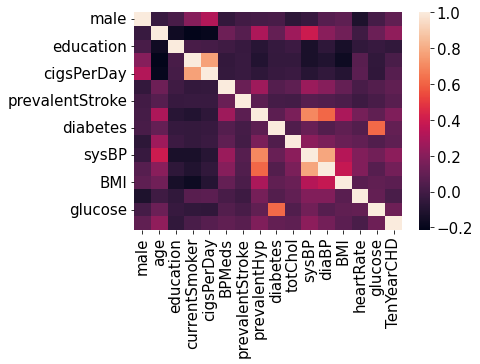

In [9]:
# checking which features are correlated with each other and are correlated with the outcome variable
df_corr = data.corr()
sns.heatmap(df_corr)

In [10]:
data = data.drop(['education'], axis=1)

In [142]:
# Checking for more missing data 
data.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

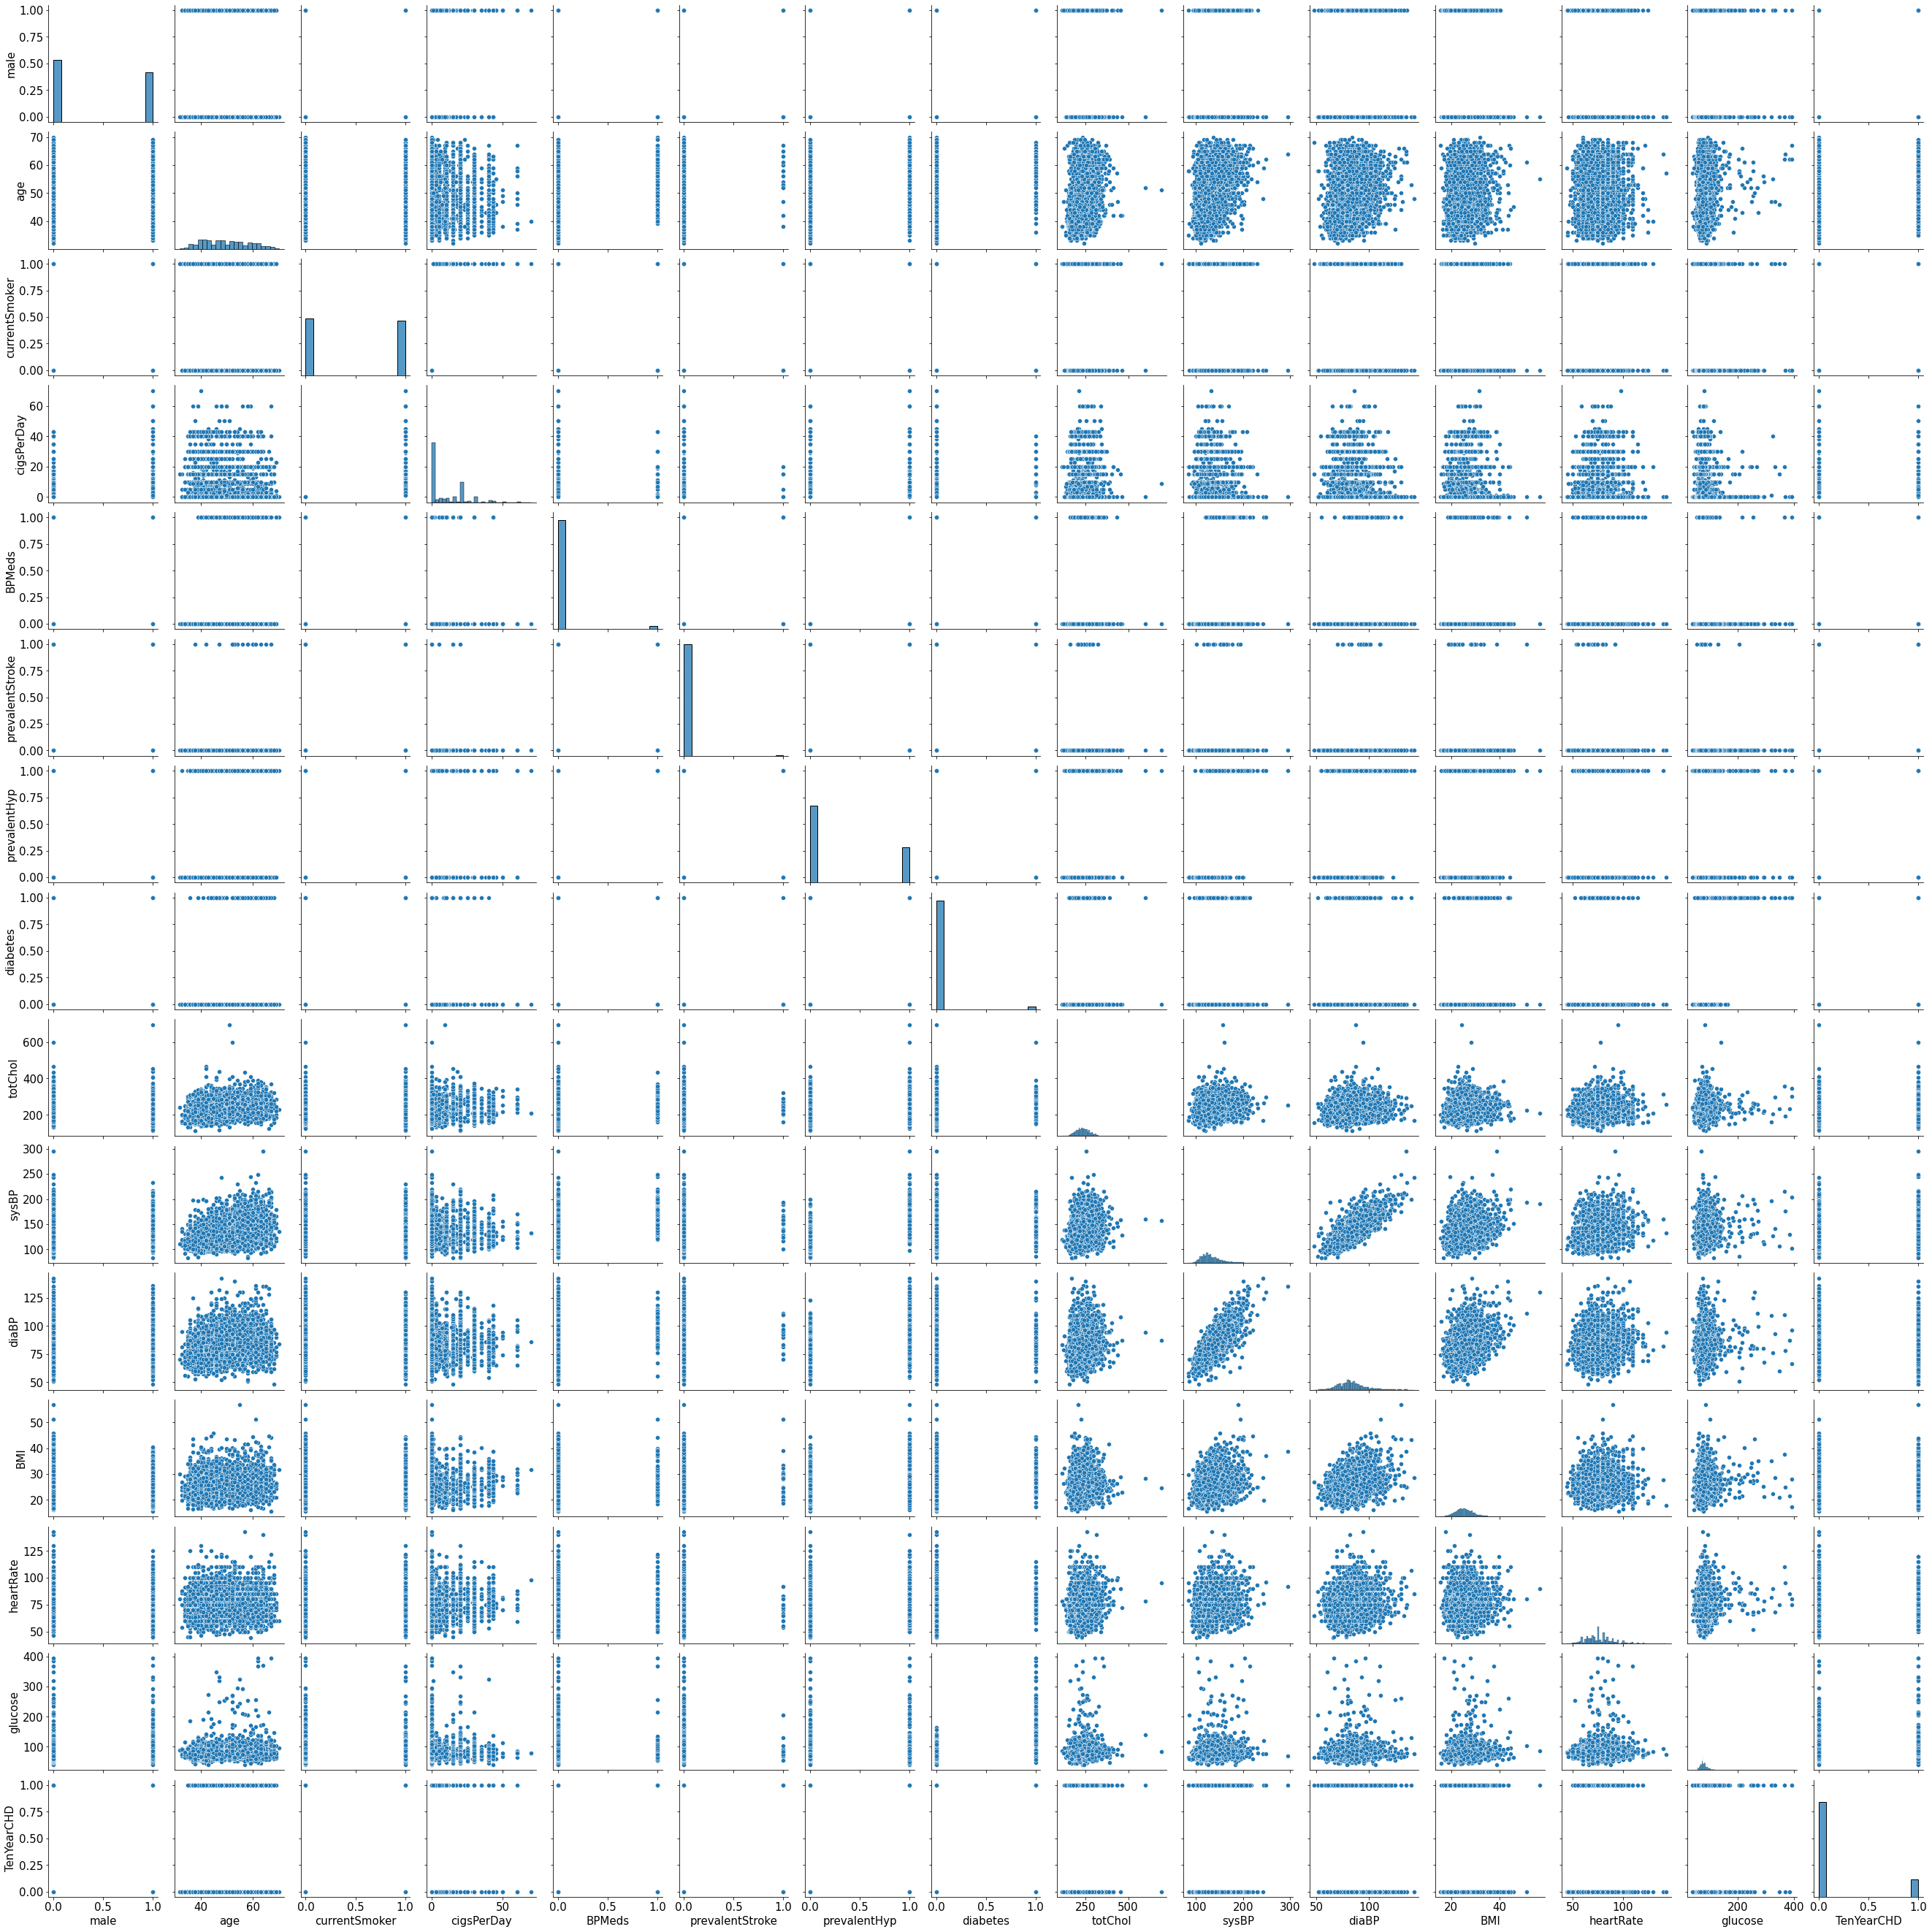

In [13]:
# Checking for outliers
data.describe()
sns.pairplot(data)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1111,0,52,2.0,0,0.0,0.0,0,1,1,600.0,159.5,94.0,28.27,78.0,140.0,1


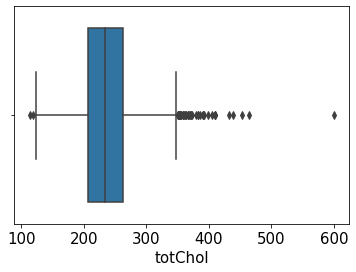

In [154]:
# Zooming into cholesterin outliers

sns.boxplot(data.totChol)
outliers = data[(data['totChol'] > 500)] 
outliers

<AxesSubplot:xlabel='totChol'>

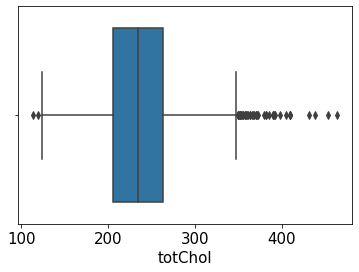

In [155]:
# Dropping 2 outliers in cholesterin
data= data.drop(data[data.totChol > 599].index)
sns.boxplot(data.totChol)

# Feature Scaling 

Since we are trying out different models, and also these that use distance as a measure, we are scaling our features

In [22]:
scaler = MinMaxScaler(feature_range=(0,1)) 
#assign scaler to column:
data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

In [23]:
data.describe()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3747.000000,3747.000000,3747.000000,3747.000000,3747.000000,3747.000000,3747.000000,3747.000000,3747.000000,3747.000000,3747.000000,3747.000000,3747.000000,3747.000000,3747.000000
mean,0.445156,0.462574,0.488391,0.128682,0.030424,0.005604,0.311449,0.026955,0.352517,0.230979,0.369626,0.248894,0.320183,0.118269,0.152389
std,0.497049,0.225565,0.499932,0.170353,0.171775,0.074663,0.463148,0.161973,0.124174,0.104254,0.126296,0.098563,0.120775,0.067445,0.359445
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.263158,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.264957,0.158392,0.285714,0.182865,0.242424,0.087571,0.000000
50%,0.000000,0.447368,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.344729,0.210402,0.359788,0.239215,0.313131,0.107345,0.000000
75%,1.000000,0.631579,1.000000,0.285714,0.000000,0.000000,1.000000,0.000000,0.430199,0.284870,0.444444,0.303442,0.383838,0.132768,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# CO1  


# Selection of Base Learners

<b>Logistic Regression </b><br>
<b> Decision Tree </b><br>
<b>KNN</b><br>
<b>SVC</b><br>

In [25]:
X=data.iloc[:,:-1].values
Y=data.iloc[:,-1].values

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [27]:
X_train

array([[1.        , 0.10526316, 1.        , ..., 0.24478914, 0.39393939,
        0.12146893],
       [0.        , 0.21052632, 0.        , ..., 0.07222492, 0.36363636,
        0.11864407],
       [1.        , 0.47368421, 1.        , ..., 0.2527872 , 0.22222222,
        0.1299435 ],
       ...,
       [1.        , 0.68421053, 1.        , ..., 0.25448376, 0.31313131,
        0.11864407],
       [0.        , 0.26315789, 0.        , ..., 0.22564227, 0.38383838,
        0.13276836],
       [1.        , 0.73684211, 1.        , ..., 0.22006786, 0.28282828,
        0.11016949]])

In [28]:
print("X training shape",X_train.shape)

X training shape (2622, 14)


# Logistic Regression

Metrics and Measures

In [119]:
normalized_df_reg = LogisticRegression().fit(X_train, Y_train)

normalized_df_reg_pred = normalized_df_reg.predict(X_test)

lacc = accuracy_score(Y_test, normalized_df_reg_pred)
print(f"The accuracy score for LogReg is: {round(acc,3)*100}%")

f1 = f1_score(Y_test, normalized_df_reg_pred)
print(f"The f1 score for LogReg is: {round(f1,3)*100}%")

precision = precision_score(Y_test, normalized_df_reg_pred)
print(f"The precision score for LogReg is: {round(precision,3)*100}%")

recall = recall_score(Y_test, normalized_df_reg_pred)
print(f"The recall score for LogReg is: {round(recall,3)*100}%")

The accuracy score for LogReg is: 83.7%
The f1 score for LogReg is: 17.1%
The precision score for LogReg is: 63.0%
The recall score for LogReg is: 9.9%


Text(0.5, 1.1, 'Confusion matrix Logistic Regression\n')

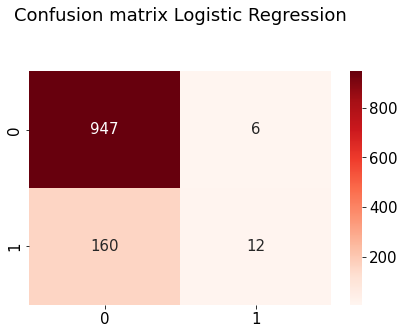

In [31]:
# plotting confusion matrix LogReg

cnf_matrix_log = confusion_matrix(Y_test, normalized_df_reg_pred)

sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True,cmap="Reds" , fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Logistic Regression\n', y=1.1)

# SVM

In [106]:
svm = SVC()

svm.fit(X_train, Y_train)

normalized_df_svm_pred = svm.predict(X_test)

acc = accuracy_score(Y_test, normalized_df_svm_pred)
print(f"The accuracy score for SVM is: {round(acc,3)*100}%")

f1 = f1_score(Y_test, normalized_df_svm_pred)
print(f"The f1 score for SVM is: {round(f1,3)*100}%")

precision = precision_score(Y_test, normalized_df_svm_pred)
print(f"The precision score for SVM is: {round(precision,3)*100}%")

recall = recall_score(Y_test, normalized_df_svm_pred)
print(f"The recall score for SVM is: {round(recall,3)*100}%")

The accuracy score for SVM is: 84.7%
The f1 score for SVM is: 4.3999999999999995%
The precision score for SVM is: 50.0%
The recall score for SVM is: 2.3%


Text(0.5, 1.1, 'Confusion matrix SVM\n')

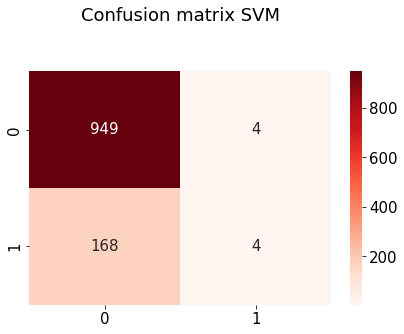

In [107]:
# plotting confusion matrix SVM

cnf_matrix_svm = confusion_matrix(Y_test, normalized_df_svm_pred)

sns.heatmap(pd.DataFrame(cnf_matrix_svm), annot=True,cmap="Reds" , fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix SVM\n', y=1.1)

# Decision Tree

In [108]:
dtc_up = DecisionTreeClassifier()

dtc_up.fit(X_train, Y_train)

normalized_df_dtc_pred = dtc_up.predict(X_test)
acc = accuracy_score(Y_test, normalized_df_dtc_pred)
print(f"The accuracy score for DTC is: {round(acc,3)*100}%")

f1 = f1_score(Y_test, normalized_df_dtc_pred)
print(f"The f1 score for DTC is: {round(f1,3)*100}%")

precision = precision_score(Y_test, normalized_df_dtc_pred)
print(f"The precision score for DTC is: {round(precision,3)*100}%")
recall = recall_score(Y_test, normalized_df_dtc_pred)
print(f"The recall score for DTC is: {round(recall,3)*100}%")

The accuracy score for DTC is: 75.8%
The f1 score for DTC is: 24.0%
The precision score for DTC is: 23.1%
The recall score for DTC is: 25.0%


Text(0.5, 1.1, 'Confusion matrix Decision Tree\n')

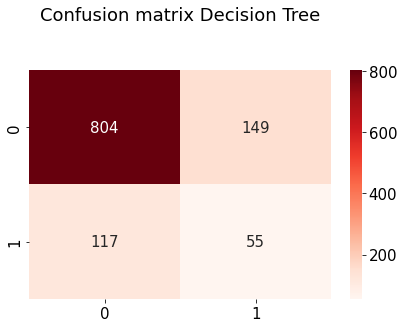

In [37]:
# plotting confusion matrix Decision Tree

cnf_matrix_dtc = confusion_matrix(Y_test, normalized_df_dtc_pred)

sns.heatmap(pd.DataFrame(cnf_matrix_dtc), annot=True,cmap="Reds" , fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Decision Tree\n', y=1.1)

# KNN

In [109]:
from sklearn.neighbors import KNeighborsClassifier  
dtc_up= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  

dtc_up.fit(X_train, Y_train)

normalized_df_dtc_pred = dtc_up.predict(X_test)

acc = accuracy_score(Y_test, normalized_df_dtc_pred)
print(f"The accuracy score for KNN is: {round(acc,3)*100}%")

f1 = f1_score(Y_test, normalized_df_dtc_pred)
print(f"The f1 score for KNN is: {round(f1,3)*100}%")

precision = precision_score(Y_test, normalized_df_dtc_pred)
print(f"The precision score for KNN is: {round(precision,3)*100}%")

recall = recall_score(Y_test, normalized_df_dtc_pred)
print(f"The recall score for KNN is: {round(recall,3)*100}%")

The accuracy score for KNN is: 83.7%
The f1 score for KNN is: 19.400000000000002%
The precision score for KNN is: 40.0%
The recall score for KNN is: 12.8%


Text(0.5, 1.1, 'Confusion matrix KNN\n')

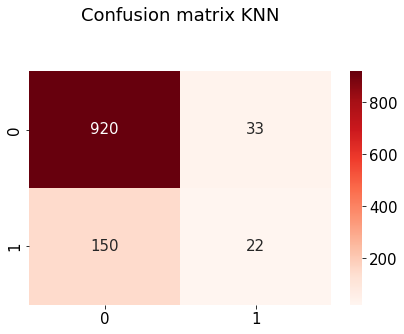

In [98]:
# plotting confusion matrix Decision Tree

cnf_matrix_dtc = confusion_matrix(Y_test, normalized_df_dtc_pred)

sns.heatmap(pd.DataFrame(cnf_matrix_dtc), annot=True,cmap="Reds" , fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix KNN\n', y=1.1)

# Boosting


In [38]:
#Ada Boost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
adboost=AdaBoostClassifier(n_estimators=50).fit(X_train,Y_train)

scores=cross_val_score(adboost,X_train,Y_train,cv=4)

print(scores.mean())



0.8432473003165146


In [156]:
#GradientBoosting
from sklearn.ensemble import GradientBoostingClassifier
gboost=GradientBoostingClassifier(n_estimators=150,learning_rate=0.01,max_depth=1,random_state=12).fit(X_train,Y_train)
a=cross_val_score(gboost,X_train,Y_train,cv=5)
a.mean()

0.8478262450018177

# CO2

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

In [43]:
estimators = []

dt_model = DecisionTreeClassifier(random_state=1)
estimators.append(('DecisionTree', dt_model))

svm_model = SVC(random_state=1)
estimators.append(('SupportVector', svm_model))

logit_model = LogisticRegression(random_state=1)
estimators.append(('Logistic Regression', logit_model))

In [44]:
from sklearn.metrics import accuracy_score

for each_estimator in (dt_model, svm_model, logit_model):
    each_estimator.fit(X_train, Y_train)
    Y_pred = each_estimator.predict(X_test)
    print(each_estimator.__class__.__name__, accuracy_score(Y_test, Y_pred))

DecisionTreeClassifier 0.7626666666666667
SVC 0.8471111111111111
LogisticRegression 0.8524444444444444


# Hard Voting

In [45]:
ensemble_model = VotingClassifier(estimators=estimators, voting='hard')
ensemble_model.fit(X_train,Y_train)
predicted_labels = ensemble_model.predict(X_test)            
print("Classifier Accuracy using Hard Voting: ", accuracy_score(Y_test, predicted_labels))

Classifier Accuracy using Hard Voting:  0.8515555555555555


# Soft Voting

In [46]:
#Soft Voting - The below code creates an ensemble using soft voting:
# create the sub models
estimators = []

dt_model = DecisionTreeClassifier(random_state=1)
estimators.append(('DecisionTree', dt_model))

svm_model = SVC(random_state=1, probability=True)
estimators.append(('SupportVector', svm_model))

logit_model = LogisticRegression(random_state=1)
estimators.append(('Logistic Regression', logit_model))

for each_estimator in (dt_model, svm_model, logit_model):
    each_estimator.fit(X_train, Y_train)
    Y_pred = each_estimator.predict(X_test)
    print(each_estimator.__class__.__name__, accuracy_score(Y_test, Y_pred))
# Using VotingClassifier() to build ensemble model with Soft Voting
ensemble_model = VotingClassifier(estimators=estimators, voting='soft')
ensemble_model.fit(X_train,Y_train)
predicted_labels = ensemble_model.predict(X_test)            
print("Classifier Accuracy using Soft Voting: ", accuracy_score(Y_test, predicted_labels))

DecisionTreeClassifier 0.7626666666666667
SVC 0.8471111111111111
LogisticRegression 0.8524444444444444
Classifier Accuracy using Soft Voting:  0.8373333333333334


# Hyper Parameter Tuning

In [47]:
from sklearn.ensemble import RandomForestClassifier
rf_1 = RandomForestClassifier(random_state=0, n_estimators=10)
rf_1.fit(X_train, Y_train)

rf_2 = RandomForestClassifier(random_state=0, n_estimators=50)
rf_2.fit(X_train, Y_train)


rf_3 = RandomForestClassifier(random_state=0, n_estimators=100)
rf_3.fit(X_train, Y_train)

RandomForestClassifier(random_state=0)

In [48]:
from sklearn.ensemble import VotingClassifier
estimators = [('rf_1', rf_1), ('rf_2', rf_2), ('rf_3', rf_3)]
ensemble = VotingClassifier(estimators, voting='hard')
ensemble.fit(X_train, Y_train)
print("rf_1.score: ", rf_1.score(X_test, Y_test))
print("rf_2.score: ", rf_2.score(X_test, Y_test))
print("rf_3.score: ", rf_3.score(X_test, Y_test))
print("ensemble.score: ", ensemble.score(X_test, Y_test))

rf_1.score:  0.8391111111111111
rf_2.score:  0.8408888888888889
rf_3.score:  0.8453333333333334
ensemble.score:  0.8444444444444444


# Soft Voting on Hyper parameter Tuning

In [49]:
estimators = [('rf_1', rf_1), ('rf_2', rf_2), ('rf_3', rf_3)]
ensemble = VotingClassifier(estimators, voting='soft')
ensemble.fit(X_train, Y_train)
print("rf_1.score: ", rf_1.score(X_test, Y_test))
print("rf_2.score: ", rf_2.score(X_test, Y_test))
print("rf_3.score: ", rf_3.score(X_test, Y_test))
print("ensemble.score: ", ensemble.score(X_test, Y_test))

rf_1.score:  0.8391111111111111
rf_2.score:  0.8408888888888889
rf_3.score:  0.8453333333333334
ensemble.score:  0.8435555555555555


# CO3 Feature Selection

In [50]:
print("training shape",X_train.shape)
print("testing shape",X_test.shape)

training shape (2622, 14)
testing shape (1125, 14)


In [51]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# PCA

In [52]:
from sklearn.decomposition import PCA
pca = PCA(0.80)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [55]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)
print(cm)
print("The testing accuracy is ",accuracy_score(Y_test, y_pred))

[[943  10]
 [155  17]]
The testing accuracy is  0.8533333333333334


In [56]:
X_train.shape

(2622, 8)

# Descision Tree

In [111]:
from sklearn.tree import DecisionTreeClassifier

In [112]:
classifier = DecisionTreeClassifier(random_state = 0)
classifier.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=0)

In [113]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)
print(cm)
print("The testing accuracy is ",accuracy_score(Y_test, y_pred))

[[808 145]
 [131  41]]
The testing accuracy is  0.7546666666666667


# SVC

In [ ]:
from sklearn.svm import SVC

In [114]:
classifier =SVC(random_state = 0)
classifier.fit(X_train, Y_train)

SVC(random_state=0)

In [116]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)
print("The testing accuracy is ",accuracy_score(Y_test, y_pred))

The testing accuracy is  0.8471111111111111


# KNN

In [58]:
from sklearn.neighbors import KNeighborsClassifier  
knn= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  

In [59]:
knn.fit(X_train, Y_train)  

KNeighborsClassifier()

In [60]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = knn.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)
print(cm)
print("The testing accuracy is ",accuracy_score(Y_test, y_pred))

[[920  33]
 [150  22]]
The testing accuracy is  0.8373333333333334


# CO4 : ANN

In [70]:
classifier = Sequential()
classifier.add(Dense(activation = "relu", input_dim = 8,
                     units = 8, kernel_initializer = "uniform"))
classifier.add(Dense(activation = "relu", units = 14, 
                     kernel_initializer = "uniform"))
classifier.add(Dense(activation = "sigmoid", units = 1, 
                     kernel_initializer = "uniform"))
classifier.compile(optimizer = 'adam' , loss = 'binary_crossentropy', 
                   metrics = ['accuracy'] )

In [71]:
classifier.fit(X_train , Y_train , batch_size = 8 ,epochs = 50  )


Epoch 1/50
328/328 [==============================] - ETA: 0s - loss: 0.5016 - accuracy: 0.84 - 1s 1ms/step - loss: 0.4943 - accuracy: 0.8474
Epoch 2/50
328/328 [==============================] - 0s 1ms/step - loss: 0.3850 - accuracy: 0.8478
Epoch 3/50
328/328 [==============================] - ETA: 0s - loss: 0.3892 - accuracy: 0.84 - 0s 1ms/step - loss: 0.3843 - accuracy: 0.8478
Epoch 4/50
328/328 [==============================] - 0s 1ms/step - loss: 0.3834 - accuracy: 0.8478: 0s - loss: 0.3860 - accuracy: 0.
Epoch 5/50
328/328 [==============================] - 0s 1ms/step - loss: 0.3833 - accuracy: 0.8478
Epoch 6/50
328/328 [==============================] - 0s 1ms/step - loss: 0.3825 - accuracy: 0.8478
Epoch 7/50
328/328 [==============================] - 0s 1ms/step - loss: 0.3826 - accuracy: 0.8478
Epoch 8/50
328/328 [==============================] - 0s 1ms/step - loss: 0.3825 - accuracy: 0.8478
Epoch 9/50
328/328 [==============================] - 0s 1ms/step - loss: 0.3807 -

In [73]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

# CO5 : Performance

# Base Models

In [104]:
d1=[['Logistic Regression',0.852],
    ['Support Vector Classifier',0.847],
    ['Decision Tree Classifier',0.762],
    ['KNN',0.837]]
d=pd.DataFrame(d1,columns=['Model','Accuracy'])
d

,Model,Accuracy
0,Logistic Regression,0.852
1,Support Vector Classifier,0.847
2,Decision Tree Classifier,0.762
3,KNN,0.837


# Ensemble Models

In [157]:
d1=[['Ensemble Model using Hard Voting',0.851],
    ['Ensemble Model using Soft Voting',0.837],
    ['Boosting(AdaBoost)',0.843]]
d=pd.DataFrame(d1,columns=['Model','Accuracy'])
d

,Model,Accuracy
0,Ensemble Model using Hard Voting,0.851
1,Ensemble Model using Soft Voting,0.837
2,Boosting(AdaBoost),0.843


# After Dimensionality Reduction

In [118]:
d1=[['Logistic Regression',0.85323],
    ['Support Vector Classifier',0.84812],
    ['Decision Tree Classifier',0.7633],
    ['KNN',0.837]]

d=pd.DataFrame(d1,columns=['Model','Accuracy'])
d

,Model,Accuracy
0,Logistic Regression,0.85323
1,Support Vector Classifier,0.84812
2,Decision Tree Classifier,0.76330
3,KNN,0.83700


# ANN Model

In [75]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm, 
                           columns = ['Predicted: 0', 'Predicted: 1'], 
                           index = ['Actual:0', 'Actual:1'])
print("accuracy_score:",accuracy_score(Y_test,y_pred))

accuracy_score: 0.8471111111111111


In [76]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred, labels = [0, 1]))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       953
           1       0.50      0.02      0.04       172

    accuracy                           0.85      1125
   macro avg       0.67      0.51      0.48      1125
weighted avg       0.80      0.85      0.78      1125

